# Classifying Handwritten digits using Tensorflow 2.x

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

##Problem Statement

**MNIST ("Modified National Institute of Standards and Technology")** is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this demo, your goal is to correctly identify digits from a dataset of thousands of handwritten images. 

####**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop Single Layer Perceptron model for classifying the handwritten digits
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add hidden layer to the model to make it Multi-Layer Perceptron
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layer neuron and check its effect on accuracy
- Use different optimizers and check its effect on accuracy
- Increase the hidden layers and check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy
- Answer: What parameters should be choosen to get best accuracy on classifying the handwritten digits?

####**Dataset Description**
MNIST Fashion Dataset



####**Skills Gained**

- TensorFlow 2.x
- Single Layer Perceptron
- Multi Layer Perceptron
- Model Improvisation

# Solution: Classifying fashion images using Tensorflow 2.x

##Installing TensorFlow 2.x

In [1]:
# !pip install tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
#verify the installation
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
print(tf.keras.__version__)


2.4.0


##Preparing the Data

###Loading the Data

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and convert the samples from integers to floating-point numbers and deal with categorical data:

In [5]:
# Loading MNIST dataset
fmnist = keras.datasets.fashion_mnist 
(X_train, Y_train), (X_test, Y_test) = fmnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


###Data Preprocessing

In [7]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

60000 train samples
10000 test samples
(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


## Designing the Model

###Preparing the Model 0: Single layer Perceptron

Build the `Sequential` model with 0 hidden layers. Choose an optimizer and loss function for training:

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In [9]:
# Compiling the model.
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Training the model. 
#training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 
#training = model_0.fit(X_test, Y_test, batch_size=100, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 1s 2ms/step - loss: 1.0326 - accuracy: 0.6748 - val_loss: 0.7607 - val_accuracy: 0.7588
Epoch 2/70
750/750 [==============================] - 1s 1ms/step - loss: 0.7083 - accuracy: 0.7736 - val_loss: 0.6569 - val_accuracy: 0.7863
Epoch 3/70
750/750 [==============================] - 1s 1ms/step - loss: 0.6353 - accuracy: 0.7964 - val_loss: 0.6102 - val_accuracy: 0.7983
Epoch 4/70
750/750 [==============================] - 1s 1ms/step - loss: 0.5958 - accuracy: 0.8072 - val_loss: 0.5783 - val_accuracy: 0.8115
Epoch 5/70
750/750 [==============================] - 1s 1ms/step - loss: 0.5697 - accuracy: 0.8145 - val_loss: 0.5581 - val_accuracy: 0.8152
Epoch 6/70
750/750 [==============================] - 1s 1ms/step - loss: 0.5510 - accuracy: 0.8196 - val_loss: 0.5425 - val_accuracy: 0.8190
Epoch 7/70
750/750 [==============================] - 1s 1ms/step - loss: 0.5366 - accuracy: 0.8238 - val_loss: 0.5309 - val_accuracy: 0.8217
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


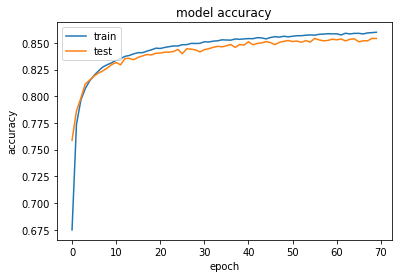

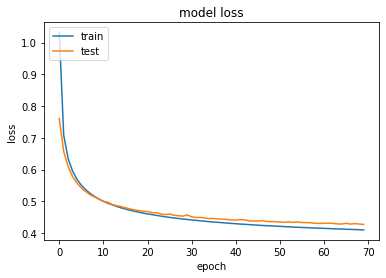

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.8418
Test accuracy: 0.8417999744415283


In [13]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_0.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 10,
    'use_bias': True}}],
 'name': 'sequential'}

###Improved Model 1: Adding Hidden Layer - Multi Layer Perceptron 

In [15]:
#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [16]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=20,validation_split=0.2) 

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 1.0135 - accuracy: 0.6856 - val_loss: 0.6805 - val_accuracy: 0.7541
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.6039 - accuracy: 0.7947 - val_loss: 0.5691 - val_accuracy: 0.8000
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5300 - accuracy: 0.8165 - val_loss: 0.5168 - val_accuracy: 0.8199
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4932 - accuracy: 0.8271 - val_loss: 0.4958 - val_accuracy: 0.8251
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4721 - accuracy: 0.8343 - val_loss: 0.4892 - val_accuracy: 0.8301
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4565 - accuracy: 0.8388 - val_loss: 0.4688 - val_accuracy: 0.8357
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4452 - accuracy: 0.8430 - val_loss: 0.4438 - val_accuracy: 0.8438
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


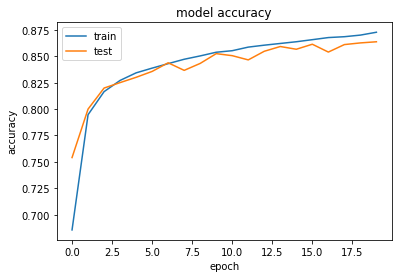

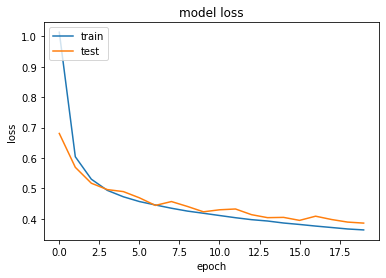

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 875us/step - loss: 0.4104 - accuracy: 0.8553
Test accuracy: 0.8553000092506409


In [20]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 64)                50240     
_________________________________________________________________
dense_layer_2 (Dense)        (None, 64)                4160      
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.weights

In [22]:
model_1.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_i

###Improved Model 2 - Adding Dropout to Avoid Overfitting

In [31]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [32]:
# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# Training the model. 
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=10, validation_split=0.2) 

Epoch 1/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3897 - accuracy: 0.8626 - val_loss: 0.3572 - val_accuracy: 0.8707
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3877 - accuracy: 0.8622 - val_loss: 0.3594 - val_accuracy: 0.8687
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3862 - accuracy: 0.8629 - val_loss: 0.3526 - val_accuracy: 0.8728
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3822 - accuracy: 0.8642 - val_loss: 0.3556 - val_accuracy: 0.8719
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3776 - accuracy: 0.8665 - val_loss: 0.3516 - val_accuracy: 0.8729
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3749 - accuracy: 0.8679 - val_loss: 0.3517 - val_accuracy: 0.8741
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3715 - accuracy: 0.8672 - val_loss: 0.3465 - val_accuracy: 0.8743
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


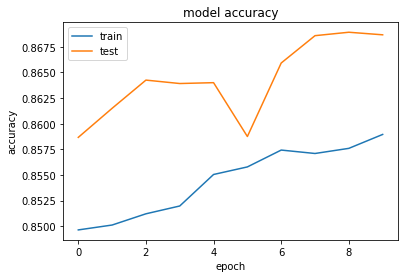

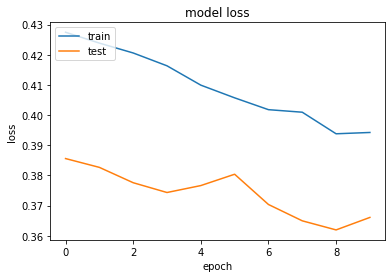

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3698 - accuracy: 0.8681
Test accuracy: 0.8680999875068665


In [29]:
model_2.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f5060bb6a90>>

In [37]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.06570391,  0.06625404,  0.07001735, ..., -0.00883118,
         -0.00416323, -0.04075779],
        [ 0.01556384, -0.04549605,  0.05106478, ..., -0.00429851,
         -0.0072891 ,  0.04002936],
        [ 0.02057106, -0.0167814 , -0.00572391, ..., -0.00910174,
         -0.07002942, -0.06898504],
        ...,
        [ 0.0220316 , -0.07064962,  0.00247214, ...,  0.07551344,
          0.0324316 ,  0.0838959 ],
        [-0.06222234,  0.00484151,  0.04380137, ..., -0.00236743,
          0.0143867 ,  0.00788035],
        [-0.01409057, -0.06241014,  0.00826926, ...,  0.00893287,
          0.06028241, -0.07447726]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 5.75031862e-02,  1.77683663e-02,  2.43359283e-02,  1.70231164e-01,
         1.23250276e-01, -1.02607757e-01,  1.67694449e-01,  1.91435441e-01,
         1.59364238e-01,  1.62894607e-01,  4.33822386e-02, 

In [38]:
model_2.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 128,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_2',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constra

###Improved Model 3: Changing the Optimizer - Adam

In [41]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [42]:
# Compiling the model.
model_3.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
# Training the model. 
training = model_3.fit(X_train, Y_train, batch_size=64, epochs=20, validation_split=0.2) 


Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.7570 - accuracy: 0.7261 - val_loss: 0.4685 - val_accuracy: 0.8282
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.5198 - accuracy: 0.8158 - val_loss: 0.4202 - val_accuracy: 0.8443
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4753 - accuracy: 0.8303 - val_loss: 0.3931 - val_accuracy: 0.8570
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4480 - accuracy: 0.8400 - val_loss: 0.3770 - val_accuracy: 0.8582
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4281 - accuracy: 0.8468 - val_loss: 0.3747 - val_accuracy: 0.8625
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4179 - accuracy: 0.8498 - val_loss: 0.3698 - val_accuracy: 0.8657
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4094 - accuracy: 0.8524 - val_loss: 0.3604 - val_accuracy: 0.8662
Epoch 

In [44]:
# Training1 the model. 
training1 = model_3.predict(X_test)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


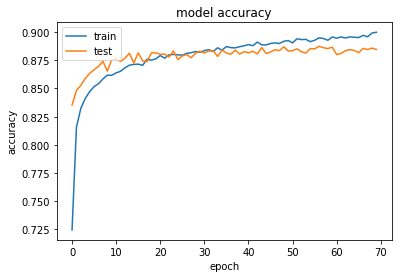

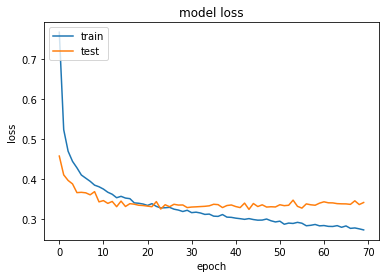

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 890us/step - loss: 0.3562 - accuracy: 0.8730
Test accuracy: 0.8730000257492065


In [47]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 64)                50240     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.weights

[<tf.Variable 'dense_layer_13/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.0470706 , -0.0605566 ,  0.05311502, ..., -0.01239798,
         -0.0326965 , -0.02283692],
        [ 0.07164595,  0.02803487, -0.02333463, ...,  0.01268711,
         -0.03852979,  0.02235638],
        [ 0.05867215, -0.01342206,  0.06247915, ...,  0.01603825,
         -0.03628643,  0.08254684],
        ...,
        [-0.01443823,  0.02990945, -0.03689074, ..., -0.03065324,
         -0.08300345, -0.03869148],
        [ 0.06107562,  0.07450309,  0.07854266, ..., -0.07303339,
         -0.01769431,  0.02703007],
        [ 0.04674842,  0.00284481, -0.06997869, ...,  0.04096612,
          0.07909941, -0.07747878]], dtype=float32)>,
 <tf.Variable 'dense_layer_13/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.10088244,  0.18129638,  0.12534155,  0.20884629, -0.1675351 ,
         0.07976656,  0.12854438,  0.1139936 ,  0.114476  ,  0.03627298,
         0.07132903, -0.01702681,  0.12008646, -0.21088558, -

In [ ]:
model_3.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_16',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
   

###Improved Model 4: Increasing the number of Hidden Layer neuron 

In [ ]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_4.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 


Epoch 1/70
750/750 [==============================] - 8s 11ms/step - loss: 0.5506 - accuracy: 0.7985 - val_loss: 0.4030 - val_accuracy: 0.8507
Epoch 2/70
750/750 [==============================] - 8s 11ms/step - loss: 0.4162 - accuracy: 0.8475 - val_loss: 0.3644 - val_accuracy: 0.8636
Epoch 3/70
750/750 [==============================] - 8s 11ms/step - loss: 0.3824 - accuracy: 0.8589 - val_loss: 0.3651 - val_accuracy: 0.8637
Epoch 4/70
750/750 [==============================] - 8s 11ms/step - loss: 0.3586 - accuracy: 0.8674 - val_loss: 0.3560 - val_accuracy: 0.8701
Epoch 5/70
750/750 [==============================] - 8s 11ms/step - loss: 0.3471 - accuracy: 0.8722 - val_loss: 0.3382 - val_accuracy: 0.8785
Epoch 6/70
750/750 [==============================] - 8s 11ms/step - loss: 0.3311 - accuracy: 0.8770 - val_loss: 0.3272 - val_accuracy: 0.8837
Epoch 7/70
750/750 [==============================] - 8s 11ms/step - loss: 0.3197 - accuracy: 0.8812 - val_loss: 0.3208 - val_accuracy: 0.8816

In [ ]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4142 - accuracy: 0.8961
Test accuracy: 0.8960999846458435


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


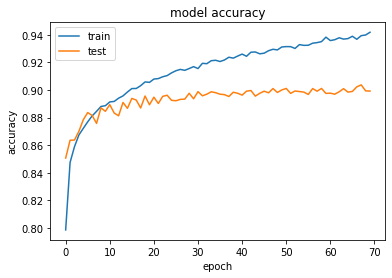

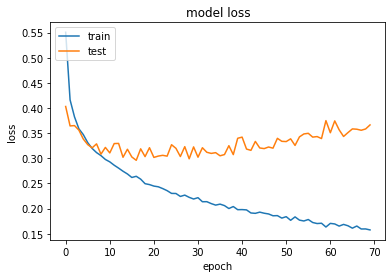

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.weights

[<tf.Variable 'dense_layer_14/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.00725385, -0.02951345, -0.01022476, ...,  0.01873028,
         -0.00124576, -0.05969054],
        [-0.04041503,  0.02794901, -0.01813392, ...,  0.04797897,
         -0.05881925, -0.03724694],
        [-0.0272625 , -0.06646182,  0.01914355, ..., -0.03670435,
          0.0431502 ,  0.02895156],
        ...,
        [-0.04489559,  0.0036691 ,  0.04210217, ...,  0.04587034,
         -0.06233099,  0.03648092],
        [-0.06230009,  0.04979425, -0.0585332 , ...,  0.04988471,
          0.03459144,  0.02808205],
        [ 0.01668332,  0.05018409,  0.02200481, ...,  0.05354574,
          0.02471522, -0.03529755]], dtype=float32)>,
 <tf.Variable 'dense_layer_14/bias:0' shape=(512,) dtype=float32, numpy=
 array([-4.91322987e-02, -3.47907729e-02,  4.97164354e-02, -4.24265079e-02,
        -6.70888126e-02, -1.49358064e-02, -7.46583641e-02, -2.26146132e-02,
         2.47198083e-02, -5.43470122e-02, -1.13672033

In [ ]:
model_4.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_18',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
  

###Improved Model 5: Manipulating the batch size

In [ ]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 256
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_5.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_5.fit(X_train, Y_train, batch_size=128, epochs=70, validation_split=0.2) 


Epoch 1/70
375/375 [==============================] - 3s 8ms/step - loss: 0.2836 - accuracy: 0.8939 - val_loss: 0.3236 - val_accuracy: 0.8849
Epoch 2/70
375/375 [==============================] - 3s 8ms/step - loss: 0.2572 - accuracy: 0.9029 - val_loss: 0.3160 - val_accuracy: 0.8852
Epoch 3/70
375/375 [==============================] - 3s 8ms/step - loss: 0.2365 - accuracy: 0.9098 - val_loss: 0.3149 - val_accuracy: 0.8942
Epoch 4/70
375/375 [==============================] - 3s 8ms/step - loss: 0.2296 - accuracy: 0.9121 - val_loss: 0.3112 - val_accuracy: 0.8926
Epoch 5/70
375/375 [==============================] - 3s 8ms/step - loss: 0.2248 - accuracy: 0.9156 - val_loss: 0.3083 - val_accuracy: 0.8961
Epoch 6/70
375/375 [==============================] - 3s 8ms/step - loss: 0.2198 - accuracy: 0.9160 - val_loss: 0.3131 - val_accuracy: 0.8905
Epoch 7/70
375/375 [==============================] - 3s 8ms/step - loss: 0.2156 - accuracy: 0.9176 - val_loss: 0.3078 - val_accuracy: 0.8939
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


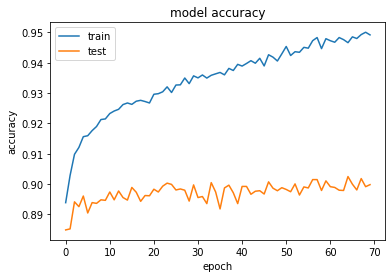

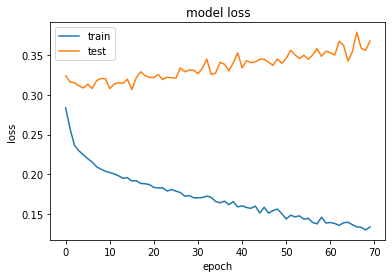

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4094 - accuracy: 0.8947
Test accuracy: 0.8946999907493591


In [ ]:
model_5.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa9bc2f320>>

In [ ]:
model_5.weights

[<tf.Variable 'dense_layer_7/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.0634052 ,  0.05583071, -0.02546262, ...,  0.00274961,
          0.00298132, -0.06102526],
        [ 0.02100741,  0.0560446 , -0.06592333, ...,  0.02014928,
         -0.06059694, -0.00232304],
        [-0.0110484 , -0.05735963, -0.04017337, ...,  0.04094408,
         -0.05134601, -0.05450907],
        ...,
        [-0.05346987,  0.05107909, -0.04738276, ..., -0.01198199,
          0.01172557,  0.00727127],
        [ 0.04084275, -0.05939313, -0.03691344, ...,  0.04278713,
          0.04301028, -0.03635497],
        [-0.03174385,  0.02921092,  0.02147333, ...,  0.01470637,
          0.03640424, -0.04842476]], dtype=float32)>,
 <tf.Variable 'dense_layer_7/bias:0' shape=(512,) dtype=float32, numpy=
 array([-4.83083785e-01,  1.08741231e-01, -2.22454026e-01, -4.15814281e-01,
        -1.87059343e-01, -1.19175941e-01, -2.90526420e-01, -2.54414618e-01,
        -1.71343103e-01,  2.85642684e-01, -7.67641887e-

In [ ]:
model_5.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_6',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
   

###Improved Model 6: Adding Another Hidden Layer to the Model

In [ ]:
import tensorflow as tf

#In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_6.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 12s 16ms/step - loss: 0.5824 - accuracy: 0.7898 - val_loss: 0.4665 - val_accuracy: 0.8259
Epoch 2/100
750/750 [==============================] - 12s 16ms/step - loss: 0.4345 - accuracy: 0.8421 - val_loss: 0.3847 - val_accuracy: 0.8580
Epoch 3/100
750/750 [==============================] - 12s 16ms/step - loss: 0.4047 - accuracy: 0.8546 - val_loss: 0.3588 - val_accuracy: 0.8709
Epoch 4/100
750/750 [==============================] - 12s 16ms/step - loss: 0.3814 - accuracy: 0.8609 - val_loss: 0.3477 - val_accuracy: 0.8743
Epoch 5/100
750/750 [==============================] - 12s 16ms/step - loss: 0.3639 - accuracy: 0.8668 - val_loss: 0.3484 - val_accuracy: 0.8767
Epoch 6/100
750/750 [==============================] - 12s 16ms/step - loss: 0.3519 - accuracy: 0.8709 - val_loss: 0.3355 - val_accuracy: 0.8766
Epoch 7/100
750/750 [==============================] - 12s 17ms/step - loss: 0.3435 - accuracy: 0.8757 - val_loss: 0.3402 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


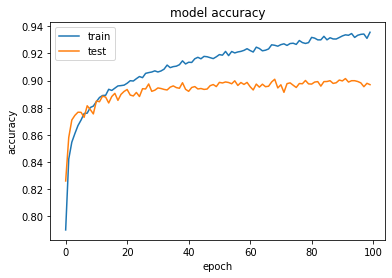

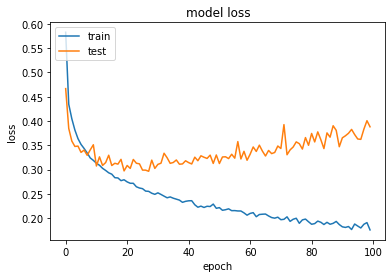

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.4325 - accuracy: 0.8951
Test accuracy: 0.8950999975204468


In [ ]:
model_6.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa9a1c0b00>>

In [ ]:
model_6.weights

[<tf.Variable 'dense_layer_8/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.02043436, -0.03052251, -0.04867187, ..., -0.00341104,
          0.0646666 ,  0.06193061],
        [ 0.00580537, -0.03989251,  0.02505963, ...,  0.00726219,
         -0.03476311, -0.04609244],
        [ 0.02528511, -0.0624702 ,  0.02157883, ...,  0.02244397,
         -0.00719848,  0.04892342],
        ...,
        [ 0.03892381,  0.06000207,  0.02830688, ..., -0.03362466,
         -0.06500859, -0.02711738],
        [-0.062404  ,  0.04495282,  0.00313219, ...,  0.05914421,
         -0.0092866 , -0.01132109],
        [-0.04838803, -0.00661732,  0.05316094, ...,  0.05458824,
         -0.0405038 ,  0.02893919]], dtype=float32)>,
 <tf.Variable 'dense_layer_8/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.2696233 , -0.21055523, -0.33684137, -0.42744735,  0.18318221,
        -0.27374473, -0.4295545 , -0.4989392 , -0.40381438, -0.0173907 ,
        -0.02753447, -0.14542247, -0.69777596, -0.59039474, -

In [ ]:
model_6.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_8',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
   

In [ ]:
import tensorflow as tf

#In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_6.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 12s 16ms/step - loss: 0.5824 - accuracy: 0.7898 - val_loss: 0.4665 - val_accuracy: 0.8259
Epoch 2/100
750/750 [==============================] - 12s 16ms/step - loss: 0.4345 - accuracy: 0.8421 - val_loss: 0.3847 - val_accuracy: 0.8580
Epoch 3/100
750/750 [==============================] - 12s 16ms/step - loss: 0.4047 - accuracy: 0.8546 - val_loss: 0.3588 - val_accuracy: 0.8709
Epoch 4/100
750/750 [==============================] - 12s 16ms/step - loss: 0.3814 - accuracy: 0.8609 - val_loss: 0.3477 - val_accuracy: 0.8743
Epoch 5/100
750/750 [==============================] - 12s 16ms/step - loss: 0.3639 - accuracy: 0.8668 - val_loss: 0.3484 - val_accuracy: 0.8767
Epoch 6/100
750/750 [==============================] - 12s 16ms/step - loss: 0.3519 - accuracy: 0.8709 - val_loss: 0.3355 - val_accuracy: 0.8766
Epoch 7/100
750/750 [==============================] - 12s 17ms/step - loss: 0.3435 - accuracy: 0.8757 - val_loss: 0.3402 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


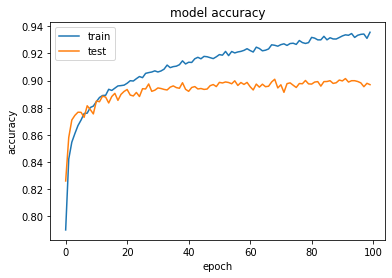

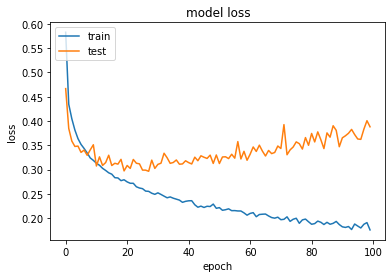

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.4325 - accuracy: 0.8951
Test accuracy: 0.8950999975204468


In [ ]:
model_6.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa9a1c0b00>>

In [ ]:
model_6.weights

[<tf.Variable 'dense_layer_8/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.02043436, -0.03052251, -0.04867187, ..., -0.00341104,
          0.0646666 ,  0.06193061],
        [ 0.00580537, -0.03989251,  0.02505963, ...,  0.00726219,
         -0.03476311, -0.04609244],
        [ 0.02528511, -0.0624702 ,  0.02157883, ...,  0.02244397,
         -0.00719848,  0.04892342],
        ...,
        [ 0.03892381,  0.06000207,  0.02830688, ..., -0.03362466,
         -0.06500859, -0.02711738],
        [-0.062404  ,  0.04495282,  0.00313219, ...,  0.05914421,
         -0.0092866 , -0.01132109],
        [-0.04838803, -0.00661732,  0.05316094, ...,  0.05458824,
         -0.0405038 ,  0.02893919]], dtype=float32)>,
 <tf.Variable 'dense_layer_8/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.2696233 , -0.21055523, -0.33684137, -0.42744735,  0.18318221,
        -0.27374473, -0.4295545 , -0.4989392 , -0.40381438, -0.0173907 ,
        -0.02753447, -0.14542247, -0.69777596, -0.59039474, -

In [ ]:
model_6.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_8',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
   

In [ ]:
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Initialization

In [ ]:
img_width, img_height = 28,28  #width and height of the images
nb_train_sample =200
nb_validation_samples =200
epochs =10
batch_size= 21
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)
print(input_shape)

(28, 28, 3)


In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons with 3*3 filter
#This class allows to create convolutional neural network to extract feature from the images

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling2D helps to reduce the size of the data

model.add(Flatten())#Converts multi dimensional array to 1D channel
model.add(Dense(64)) #64 neurons with 3*3 filter
#Numbers of output nodes in the hidden layer
model.add(Activation('relu'))
model.add(Dense(1)) #output layer
model.add(Activation('sigmoid')) #sigmoid activation function
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                692288    
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                692288    
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
print(X_train.shape)

(60000, 784)


In [ ]:
training = model.fit_generator(X_train,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=X_test,
                       validation_steps=nb_validation_samples)

Epoch 1/10


ValueError: ignored

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


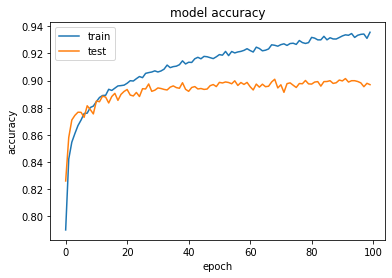

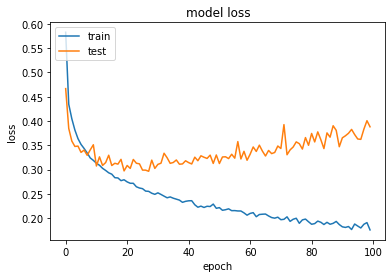

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.4325 - accuracy: 0.8951
Test accuracy: 0.8950999975204468


In [ ]:
model_6.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa9a1c0b00>>

In [ ]:
model_6.weights

[<tf.Variable 'dense_layer_8/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.02043436, -0.03052251, -0.04867187, ..., -0.00341104,
          0.0646666 ,  0.06193061],
        [ 0.00580537, -0.03989251,  0.02505963, ...,  0.00726219,
         -0.03476311, -0.04609244],
        [ 0.02528511, -0.0624702 ,  0.02157883, ...,  0.02244397,
         -0.00719848,  0.04892342],
        ...,
        [ 0.03892381,  0.06000207,  0.02830688, ..., -0.03362466,
         -0.06500859, -0.02711738],
        [-0.062404  ,  0.04495282,  0.00313219, ...,  0.05914421,
         -0.0092866 , -0.01132109],
        [-0.04838803, -0.00661732,  0.05316094, ...,  0.05458824,
         -0.0405038 ,  0.02893919]], dtype=float32)>,
 <tf.Variable 'dense_layer_8/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.2696233 , -0.21055523, -0.33684137, -0.42744735,  0.18318221,
        -0.27374473, -0.4295545 , -0.4989392 , -0.40381438, -0.0173907 ,
        -0.02753447, -0.14542247, -0.69777596, -0.59039474, -

In [ ]:
model_6.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_8',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
   

In [ ]:
import tensorflow as tf

#In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_6.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 12s 16ms/step - loss: 0.5824 - accuracy: 0.7898 - val_loss: 0.4665 - val_accuracy: 0.8259
Epoch 2/100
750/750 [==============================] - 12s 16ms/step - loss: 0.4345 - accuracy: 0.8421 - val_loss: 0.3847 - val_accuracy: 0.8580
Epoch 3/100
750/750 [==============================] - 12s 16ms/step - loss: 0.4047 - accuracy: 0.8546 - val_loss: 0.3588 - val_accuracy: 0.8709
Epoch 4/100
750/750 [==============================] - 12s 16ms/step - loss: 0.3814 - accuracy: 0.8609 - val_loss: 0.3477 - val_accuracy: 0.8743
Epoch 5/100
750/750 [==============================] - 12s 16ms/step - loss: 0.3639 - accuracy: 0.8668 - val_loss: 0.3484 - val_accuracy: 0.8767
Epoch 6/100
750/750 [==============================] - 12s 16ms/step - loss: 0.3519 - accuracy: 0.8709 - val_loss: 0.3355 - val_accuracy: 0.8766
Epoch 7/100
750/750 [==============================] - 12s 17ms/step - loss: 0.3435 - accuracy: 0.8757 - val_loss: 0.3402 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


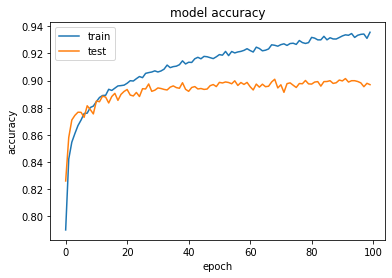

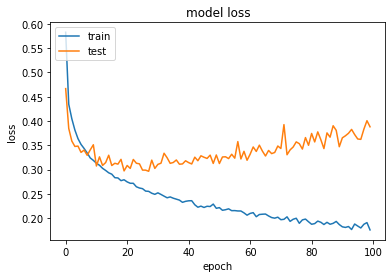

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.4325 - accuracy: 0.8951
Test accuracy: 0.8950999975204468


In [ ]:
model_6.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa9a1c0b00>>

In [ ]:
model_6.weights

[<tf.Variable 'dense_layer_8/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.02043436, -0.03052251, -0.04867187, ..., -0.00341104,
          0.0646666 ,  0.06193061],
        [ 0.00580537, -0.03989251,  0.02505963, ...,  0.00726219,
         -0.03476311, -0.04609244],
        [ 0.02528511, -0.0624702 ,  0.02157883, ...,  0.02244397,
         -0.00719848,  0.04892342],
        ...,
        [ 0.03892381,  0.06000207,  0.02830688, ..., -0.03362466,
         -0.06500859, -0.02711738],
        [-0.062404  ,  0.04495282,  0.00313219, ...,  0.05914421,
         -0.0092866 , -0.01132109],
        [-0.04838803, -0.00661732,  0.05316094, ...,  0.05458824,
         -0.0405038 ,  0.02893919]], dtype=float32)>,
 <tf.Variable 'dense_layer_8/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.2696233 , -0.21055523, -0.33684137, -0.42744735,  0.18318221,
        -0.27374473, -0.4295545 , -0.4989392 , -0.40381438, -0.0173907 ,
        -0.02753447, -0.14542247, -0.69777596, -0.59039474, -

In [ ]:
model_6.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_8',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
   

###Improved Model 7: Use rmsprop

In [48]:
import tensorflow as tf

#In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_7 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_7.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_7.add(Dropout(0.3))

# Adding another dense layer:
model_7.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_7.add(Dropout(0.3))

# Adding another dense layer:
model_7.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_7.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_7.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [49]:
# Compiling the model.
model_7.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
# Training the model. 
training = model_7.fit(X_train, Y_train, batch_size=64, epochs=10, validation_split=0.2) 

Epoch 1/10
750/750 [==============================] - 15s 20ms/step - loss: 0.6219 - accuracy: 0.7757 - val_loss: 0.4862 - val_accuracy: 0.8347
Epoch 2/10
750/750 [==============================] - 15s 20ms/step - loss: 0.4932 - accuracy: 0.8281 - val_loss: 0.4205 - val_accuracy: 0.8443
Epoch 3/10
750/750 [==============================] - 15s 20ms/step - loss: 0.4783 - accuracy: 0.8398 - val_loss: 0.4419 - val_accuracy: 0.8447
Epoch 4/10
750/750 [==============================] - 15s 20ms/step - loss: 0.4738 - accuracy: 0.8438 - val_loss: 0.4088 - val_accuracy: 0.8615
Epoch 5/10
750/750 [==============================] - 15s 20ms/step - loss: 0.4779 - accuracy: 0.8437 - val_loss: 0.4981 - val_accuracy: 0.8138
Epoch 6/10
750/750 [==============================] - 15s 20ms/step - loss: 0.4803 - accuracy: 0.8460 - val_loss: 0.4053 - val_accuracy: 0.8717
Epoch 7/10
750/750 [==============================] - 15s 20ms/step - loss: 0.4764 - accuracy: 0.8503 - val_loss: 0.4374 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


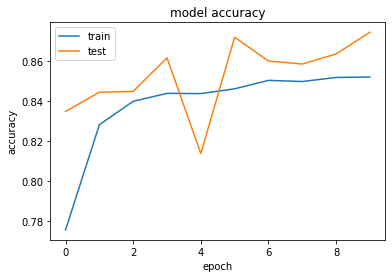

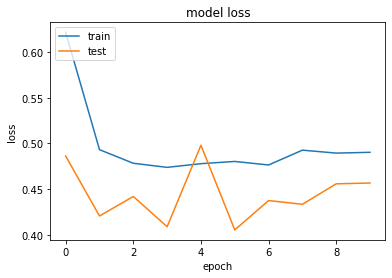

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
#evaluate the model
test_loss, test_acc = model_7.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.4740 - accuracy: 0.8608
Test accuracy: 0.86080002784729


In [ ]:
model_7.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa9a1c0b00>>

In [ ]:
model_7.weights

[<tf.Variable 'dense_layer_8/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.02043436, -0.03052251, -0.04867187, ..., -0.00341104,
          0.0646666 ,  0.06193061],
        [ 0.00580537, -0.03989251,  0.02505963, ...,  0.00726219,
         -0.03476311, -0.04609244],
        [ 0.02528511, -0.0624702 ,  0.02157883, ...,  0.02244397,
         -0.00719848,  0.04892342],
        ...,
        [ 0.03892381,  0.06000207,  0.02830688, ..., -0.03362466,
         -0.06500859, -0.02711738],
        [-0.062404  ,  0.04495282,  0.00313219, ...,  0.05914421,
         -0.0092866 , -0.01132109],
        [-0.04838803, -0.00661732,  0.05316094, ...,  0.05458824,
         -0.0405038 ,  0.02893919]], dtype=float32)>,
 <tf.Variable 'dense_layer_8/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.2696233 , -0.21055523, -0.33684137, -0.42744735,  0.18318221,
        -0.27374473, -0.4295545 , -0.4989392 , -0.40381438, -0.0173907 ,
        -0.02753447, -0.14542247, -0.69777596, -0.59039474, -

In [ ]:
model_7.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_8',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')